In [1]:
import json
import numpy as np
import scipy as sp

from scipy.stats import norm
from scipy.spatial import distance
from matplotlib import style
from matplotlib import pyplot as plt

style.use('ggplot')
%matplotlib inline

In [2]:
gCenter = np.random.rand(8,2) * 4096 - 2048
gWeight = np.abs(np.random.randn(8))
gIndex = np.random.choice(8, 512, p=gWeight/gWeight.sum())
gDist = np.random.randn(512, 2) * 256

points = gDist + gCenter[gIndex,:]

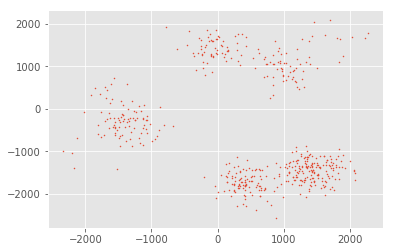

In [3]:
plt.scatter(points[:,0], points[:,1], s=1)

In [4]:
disG = distance.cdist(gCenter, points)
probG = norm.pdf(disG/(256))
probG = probG / probG.sum(axis=1,keepdims=True)
adjMatrix = np.zeros((512,512), np.bool) 

In [5]:
counter = 0
while adjMatrix.sum() < 512*9:
    i = np.random.choice(8, p=gWeight/gWeight.sum())
    source, target = np.random.choice(512, 2, p=probG[i])
    if source == target:
        continue
    elif source > target:
        source, target = target, source
    adjMatrix[source][target] = True
    
    counter += 1
    if not counter % 500:
    # Increase prob to pick points further
    
        probG = norm.pdf(disG/(256*(1+counter//2500)))
        probG = probG / probG.sum(axis=1,keepdims=True)  
        
        print("Round ", counter, "finished. ", 
              adjMatrix.sum(), "links created.")
        
        
linksPos = np.argwhere(adjMatrix)

Round  500 finished.  485 links created.
Round  1000 finished.  963 links created.
Round  1500 finished.  1416 links created.
Round  2000 finished.  1855 links created.
Round  2500 finished.  2275 links created.
Round  3000 finished.  2725 links created.
Round  3500 finished.  3146 links created.
Round  4000 finished.  3578 links created.
Round  4500 finished.  4010 links created.
Round  5000 finished.  4443 links created.


In [6]:
nodes = []
for i, (px, py), g in zip(range(512), points.tolist(), gIndex):
    nodes.append({
        "id": str(i),
        "x": float(px/2),
        "y": float(py/2),
        "group": int(g)
    })
    
links = []
for source, target in linksPos:
    if gIndex[source] != gIndex[target]:
        isBridge = True
    else:
        isBridge = False
        
    links.append({
        "source": str(source),
        "target": str(target),
        "isBridge": isBridge
    })

In [7]:
with open(b"C:\Users\kaidonghu\Desktop\d3graphdemo\graph.json", "w") as f:
    json.dump({
        "nodes":nodes,
        "links":links
    }, f, indent=2)